In [1]:
import matplotlib.pyplot as plt

from scripts import tabular_baselines

import seaborn as sns
import numpy as np

from datasets import load_openml_list, valid_dids_classification, test_dids_classification, open_cc_dids
from scripts.tabular_baselines import *
from scripts.tabular_evaluation import evaluate
from scripts.tabular_metrics import calculate_score, make_ranks_and_wins_table, make_metric_matrix
from scripts import tabular_metrics
from scripts.transformer_prediction_interface import TabPFNClassifier

/anaconda/envs/tabpfn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from notebook_utils import *

In [3]:
%load_ext autoreload

%autoreload 2

# Datasets

In [4]:
from datasets import load_openml_list, open_cc_dids, open_cc_valid_dids, test_dids_classification

cc_valid_datasets_multiclass, cc_valid_datasets_multiclass_df = load_openml_list(open_cc_valid_dids, multiclass=True, shuffled=True, filter_for_nan=False, max_samples = 10000, num_feats=100, return_capped=True)


Number of datasets: 149


# Setting params

In [5]:
import os
eval_positions = [1000]
max_features = 100
bptt = 2000
base_path = os.path.join('.')
overwrite = False
#max_times = [0.5, 1, 15, 30, 60, 60*5, 60*15, 60*60]
#max_times = [1, 15]
max_times = [1, 15, 30, 60, 60 * 5, 60 * 15, 60*60]
metric_used = tabular_metrics.auc_metric
task_type = 'multiclass'

In [6]:
from scripts.distill_mlp import DistilledTabPFNMLP
from tabpfn.transformer_make_model import PermutationsMeta, ForwardMLPModel
from functools import partial
from scripts.tabular_baselines import knn_metric, catboost_metric, transformer_metric, logistic_metric, xgb_metric, random_forest_metric, mlp_metric, flaml_lgbm_metric


# Baseline Evaluation
This section runs baselines and saves results locally.

In [7]:
!mkdir -p {base_path}/results
!mkdir -p {base_path}/results/tabular/
!mkdir -p {base_path}/results/tabular/multiclass/

In [8]:
#cc_valid_datasets_multiclass_df['isNumeric'] = (cc_valid_datasets_multiclass_df.NumberOfSymbolicFeatures == 1) & (cc_valid_datasets_multiclass_df.NumberOfInstancesWithMissingValues == 0) * (cc_valid_datasets_multiclass_df.NumberOfFeatures > 4)
#name_indexed_dataset = cc_valid_datasets_multiclass_df.set_index("name")

#numeric_valid_datasets = [ds for ds in cc_valid_datasets_multiclass if name_indexed_dataset.loc[ds[0]].isNumeric]
#len(numeric_valid_datasets)
len(cc_valid_datasets_multiclass)

149

In [9]:
import os
os.environ["LD_LIBRARY_PATH"] = "/anaconda/envs/fresh311/lib:" + os.environ["LD_LIBRARY_PATH"]

In [10]:
from tabpfn.scripts.tabular_evaluation import eval_on_datasets
max_times = [1, 5, 15, 60, 5 * 60, 15 * 60, 60* 60]
# these will all be evaluated on CPU because they are given as  callables, which is a weird way to do it.
clf_dict= {
    'knn': knn_metric,
    'rf_new_params': random_forest_metric,
    'xgb': xgb_metric,
    'logistic': logistic_metric,
    'mlp': mlp_metric}

results_baselines = [
    eval_on_datasets('multiclass', model, model_name, cc_valid_datasets_multiclass, eval_positions=eval_positions, max_times=max_times,
                     metric_used=metric_used, split_numbers=[1, 2, 3, 4, 5],
                     bptt=bptt, base_path=base_path)
    for model_name, model in clf_dict.items()
]

evaluating knn on cpu


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 2076 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 4865 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 5215 out of 5215 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


evaluating rf_new_params on cpu


[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3394 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 4608 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 5215 out of 5215 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


evaluating xgb on cpu


[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 3394 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 4608 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 5024 out of 5215 | elapsed:    5.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 5215 out of 5215 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


evaluating logistic on cpu


[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 3394 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 4608 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 5215 out of 5215 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


evaluating mlp on cpu


[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 3394 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 4608 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 5024 out of 5215 | elapsed:    5.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 5215 out of 5215 | elapsed:    5.9s finished


In [11]:
from tabpfn.scripts.tabular_evaluation import eval_on_datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from tabpfn.transformer_make_model import ShiftClassifier, EnsembleMeta, ForwardMLPModel

# transformers don't have max times
import warnings
max_times = [1]
#device = "cuda:1"
device = "cpu"


In [13]:

model_string = "defaults_k_aggregate_2_batch_128_onehot_classes_multiclass_02_10_2023_23_55_16"
tabpfn_mine =  TabPFNClassifier(device=device, model_string=model_string, epoch=82, N_ensemble_configurations=32)
#tabpfn_refactor = TabPFNClassifier(device=device, model_string="vanilla_lr0001_new_05_31_2023_23_16_43", epoch=200, N_ensemble_configurations=32)
#tabpfn_refactor_epoch_290 = TabPFNClassifier(device=device, model_string="vanilla_lr0001_new_05_31_2023_23_16_43", epoch=290, N_ensemble_configurations=32)

distilled_tabpfn = DistilledTabPFNMLP(n_epochs=1000, device=device, hidden_size=128, n_layers=2, dropout_rate=.1, learning_rate=0.01, model_string=model_string, epoch=82, )
distilled_tabpfn_one_layer = make_pipeline(StandardScaler(),DistilledTabPFNMLP(n_epochs=1000, device=device, hidden_size=128, n_layers=1, dropout_rate=.1, learning_rate=0.01, model_string=model_string, epoch=82, ))
distilled_tabpfn_one_layer_no_dropout = make_pipeline(StandardScaler(),DistilledTabPFNMLP(n_epochs=1000, device=device, hidden_size=128, n_layers=1, dropout_rate=0, learning_rate=0.01, model_string=model_string, epoch=82, ))
distilled_tabpfn_two_layer_reproduce2 = make_pipeline(StandardScaler(), DistilledTabPFNMLP(n_epochs=1000, device=device, hidden_size=128, n_layers=2, dropout_rate=.1, learning_rate=0.01, model_string=model_string, epoch=82, ))
distilled_tabpfn_one_layer_512_no_dropout = make_pipeline(StandardScaler(),DistilledTabPFNMLP(n_epochs=1000, device=device, hidden_size=512, n_layers=1, learning_rate=0.001, model_string=model_string, epoch=82, ))
distilled_tabpfn_two_layer_512_no_dropout = make_pipeline(StandardScaler(),DistilledTabPFNMLP(n_epochs=1000, device=device, hidden_size=512, n_layers=2, learning_rate=0.001, model_string=model_string, epoch=82, ))

distilled_tabpfn_two_layer_reproduce_gpu = make_pipeline(StandardScaler(), DistilledTabPFNMLP(n_epochs=1000, device=device, hidden_size=128, n_layers=2, dropout_rate=.1, learning_rate=0.01, model_string=model_string, epoch=82, ))
distilled_tabpfn_two_layer_reproduce_gpu_ensemble_3 = make_pipeline(StandardScaler(), DistilledTabPFNMLP(n_epochs=1000, device=device, hidden_size=128, n_layers=2, dropout_rate=.1, learning_rate=0.01, model_string=model_string, epoch=82, N_ensemble_configurations=3))
distilled_tabpfn_two_layer_reproduce_cpu_ensemble_3 = make_pipeline(StandardScaler(), DistilledTabPFNMLP(n_epochs=1000, device="cpu", hidden_size=128, n_layers=2, dropout_rate=.1, learning_rate=0.01, model_string=model_string, epoch=82, N_ensemble_configurations=3))



mother_model_string = "models_diff/prior_diff_real_checkpointcontinue_hidden_128_embed_dim_1024_decoder_nhid_2048_nlayer12_lr0003_n_0_epoch_65.cpkt"
forward_mlp = PermutationsMeta(ForwardMLPModel(path=mother_model_string, device=device))
mothernet_new = PermutationsMeta(ForwardMLPModel(path='models_diff/prior_diff_real_checkpointcontinue_hidden_128_embed_dim_1024_decoder_nhid_2048_nlayer12_lr0003_n_0_epoch_on_exit.cpkt'))
mothernet_new_again = PermutationsMeta(ForwardMLPModel(path='models_diff/mothernet_from_scratch_again_06_28_2023_20_51_25_epoch_on_exit.cpkt'))

mothernet_big_model_string = "models_diff/prior_diff_real_checkpointwarm_start_depth_18_model_maker_lr0003_multiclass_05_30_2023_22_53_04_n_0_epoch_49.cpkt"
mothernet_big = PermutationsMeta(ForwardMLPModel(path=mothernet_big_model_string, device=device))

model_string_post_refactor = "models_diff/prior_diff_real_checkpointmothernet_from_scratch_lr0003_warm_start_continue2_multiclass_05_31_2023_19_21_34_n_0_epoch_94.cpkt"
mothernet_post_refactor = PermutationsMeta(ForwardMLPModel(path=model_string_post_refactor, device=device))

model_string_mothernet_small_batches = "models_diff/mothernet_512_everywhere_steps_1024_batch_16_07_02_2023_17_29_55_epoch_on_exit.cpkt"
mothernet_small_batches = PermutationsMeta(ForwardMLPModel(path=model_string_mothernet_small_batches, device=device))


model_string_old_reference_config = "reproduce_reference_config_06_02_2023_17_08_59"
old_reference_config = TabPFNClassifier(device=device, model_string=model_string_old_reference_config, epoch="on_exit", N_ensemble_configurations=32)
old_reference_config_epoch_290 = TabPFNClassifier(device=device, model_string=model_string_old_reference_config, epoch=290, N_ensemble_configurations=32)

model_string_reference_config_continue =  "reproduce_reference_config_continue_06_05_2023_17_45_06"
reference_config_continue = TabPFNClassifier(device=device, model_string=model_string_reference_config_continue, epoch="on_exit", N_ensemble_configurations=32)



model_string_reference_config_long = "reproduce_reference_config_try_again_800_epochs_06_07_2023_21_49_10"
reference_config_long = TabPFNClassifier(device=device, model_string=model_string_reference_config_long, epoch="on_exit", N_ensemble_configurations=32)

perceiver_long = ForwardMLPModel(path="models_diff/perceiver_output_128_emsize_512_nlayers_12_steps_1024_07_01_2023_17_56_04_epoch_690.cpkt", device=device)
perceiver_long_permutations = PermutationsMeta(perceiver_long)

model_string_newest_mlflow = "models_diff/mothernet_128_decoder_1024_emsize_512_nlayers_12_steps_1024_bs_32a_lr_0.0001_1_gpu_07_19_2023_04_54_38_epoch_1350.cpkt"
mothernet_mlflow_04_54_38 = PermutationsMeta(ForwardMLPModel(path=model_string_newest_mlflow, device=device))

model_string_newest_mlflow_1750 = "models_diff/mothernet_128_decoder_1024_emsize_512_nlayers_12_steps_1024_bs_32a_lr_0.0001_1_gpu_07_19_2023_04_54_38_epoch_1750.cpkt"
mothernet_mlflow_04_54_38_e1750 = PermutationsMeta(ForwardMLPModel(path=model_string_newest_mlflow_1750, device=device))
mothernet_mlflow_04_54_38_e1750_ensemble = EnsembleMeta(ForwardMLPModel(path=model_string_newest_mlflow_1750, device=device))


#mothernet_tabpfn_preprocessing =  TabPFNClassifier(device=device, model_string="mothernet_128_decoder_1024_emsize_512_nlayers_12_steps_1024_bs_32a_lr_0.0001_1_gpu_07_19_2023_04_54_38", epoch="1350", N_ensemble_configurations=32)

#mothernet_new_old_tabpfn_preprocessing =  TabPFNClassifier(device=device, model_string="prior_diff_real_checkpointcontinue_hidden_128_embed_dim_1024_decoder_nhid_2048_nlayer12_lr0003_n_0", epoch="on_exit", N_ensemble_configurations=32)
#mothernet_new_old_ensemble =  EnsembleMeta(ForwardMLPModel(device=device, path="models_diff/prior_diff_real_checkpointcontinue_hidden_128_embed_dim_1024_decoder_nhid_2048_nlayer12_lr0003_n_0_epoch_on_exit.cpkt"), n_estimators=32)

#mothernet_1750_tabpfn_preprocessing =  TabPFNClassifier(device=device, model_string="mothernet_128_decoder_1024_emsize_512_nlayers_12_steps_1024_bs_32a_lr_0.0001_1_gpu_07_19_2023_04_54_38", epoch="1750", N_ensemble_configurations=32)


perceiver_16_19_18_ensemble =  EnsembleMeta(ForwardMLPModel(device=device, path="models_diff/perceiver_128_emsize_512_nlayers_12_steps_4096_batch_64_lr_3e-05_one_gpu_07_11_2023_16_19_18_epoch_1120.cpkt"), n_estimators=32)

mlflow_validate_str = "tabpfn_128_decoder_1024_emsize_512_nlayers_12_steps_1024_bs_8ada_lr_3e-05_1_gpu_07_21_2023_21_58_32"
mlflow_validate_tabpfn = TabPFNClassifier(device=device, model_string=mlflow_validate_str, epoch="1470", N_ensemble_configurations=32)

#mother_of_ensembles = BaggingClassifier(PermutationsMeta(ForwardMLPModel(path=mother_model_string)), max_features=.8, max_samples=.8)
#mother_of_ensembles_again = BaggingClassifier(PermutationsMeta(ForwardMLPModel(path=mother_model_string)), max_features=.5, max_samples=.5)
forward_mlp_scaled = make_pipeline(StandardScaler(), forward_mlp)
distilled_tabpfn_scaled = make_pipeline(StandardScaler(), distilled_tabpfn)


#new_tabpfn_long_e1020 = TabPFNClassifier(device=device, model_string="tabpfn__emsize_512_nlayers_12_steps_2048_bs_32ada_lr_0.0001_1_gpu_07_24_2023_01_43_33", epoch="1020", N_ensemble_configurations=32)
new_tabpfn_long_e1650_ensemble32 = TabPFNClassifier(device=device, model_string="tabpfn__emsize_512_nlayers_12_steps_2048_bs_32ada_lr_0.0001_1_gpu_07_24_2023_01_43_33", epoch="1650", N_ensemble_configurations=32)
new_tabpfn_long_e1650_ensemble3 = TabPFNClassifier(device=device, model_string="tabpfn_nooptimizer_emsize_512_nlayers_12_steps_2048_bs_32ada_lr_0.0001_1_gpu_07_24_2023_01_43_33", epoch="1650", N_ensemble_configurations=3)

# large batchsize large learning rate
mothernet_old_config_repro_20_10_21_ensemble = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_512_bs_8192_lr_0.0003_1_gpu_07_28_2023_20_10_21_epoch_2000.cpkt", device=device))
# small batchsize small learning rate
mothernet_new_config_04_14_37_ensemble_e1390 = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_epoch_1390.cpkt", device=device)) 
mothernet_new_config_04_14_37_ensemble_e1520 = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_epoch_1520.cpkt", device=device)) 

mothernet_01_07_16_e1560 = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_continue_08_12_2023_01_07_16_epoch_1560.cpkt", device=device))
mothernet_21_29_51_e5610 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_n1024_E8000_1_gpu_08_01_2023_21_29_51_epoch_5610.cpkt", device=device))

low_rank_48_19 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_n1024_L2_W128_P512_1_gpu_08_03_2023_03_48_19_epoch_on_exit.cpkt", device=device))
mothernet_L2_18_33_e780 = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_31_2023_23_18_33_epoch_780.cpkt", device=device))

mothernet_15_46_11_e120 =  EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d1024_H2048_l1e-06_b32_noprenormTrue_1_gpu_warm_08_13_2023_15_46_11_epoch_130.cpkt", device=device))
tabpfn_21_43_17_e760 =  TabPFNClassifier(model_string="tabpfn_n512_l1e-05_b32_mtabpfn_noprenormTrue_1_gpu_warm_08_11_2023_21_43_17", device=device, epoch=760, N_ensemble_configurations=32)
mothernet_01_07_16_e1720 = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_continue_08_12_2023_01_07_16_epoch_1720.cpkt", device=device))
mothernet_01_07_16_e1720_gpu = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_continue_08_12_2023_01_07_16_epoch_1720.cpkt", device=device))
mothernet_01_07_16_e1720_gpu_ensemble3 = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_continue_08_12_2023_01_07_16_epoch_1720.cpkt", device=device), n_estimators=3)
mothernet_01_07_16_e1720_cpu_ensemble3 = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_continue_08_12_2023_01_07_16_epoch_1720.cpkt", device="cpu"), n_estimators=3)
mothernet_01_07_16_e1720_gpu_ensemble3_gpu_inference = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_continue_08_12_2023_01_07_16_epoch_1720.cpkt", device=device, inference_device=device), n_estimators=3)
mothernet_05_25_46_e5900 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_n1024_E8000_d2048_H4096_L2_W128_P512_1_gpu_08_06_2023_05_25_46_epoch_5900.cpkt", device=device))
mothernet_01_07_16_e1720_cpu_ensemble32 = EnsembleMeta(ForwardMLPModel(path="models_diff/mothernet_128_decoder_2048_emsize_512_nlayers_12_steps_8192_bs_8ada_lr_3e-05_1_gpu_07_26_2023_04_14_37_continue_08_12_2023_01_07_16_epoch_1720.cpkt", device="cpu"), n_estimators=32)


#mothernet_L2_W128_05_25_46_e6550 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_n1024_E8000_d2048_H4096_L2_W128_P512_1_gpu_08_06_2023_05_25_46_epoch_6550.cpkt", device=device))
mothernet_L2_W128_05_25_46_e7480 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_n1024_E8000_d2048_H4096_L2_W128_P512_1_gpu_08_06_2023_05_25_46_epoch_7480.cpkt", device=device))

mothernet_16_28_11_e1870_ensemble32 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_1_gpu_08_04_2023_16_28_11_epoch_1870_kept_for_eval.cpkt", device=device), n_estimators=32)
mothernet_16_28_11_e1870_ensemble3 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_1_gpu_08_04_2023_16_28_11_epoch_1870_kept_for_eval.cpkt", device=device), n_estimators=3)
mothernet_16_28_11_e1980_ensemble32 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_1_gpu_08_04_2023_16_28_11_epoch_1980_kept_for_eval.cpkt", device=device), n_estimators=32)
mothernet_16_28_11_e1980_ensemble3 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_1_gpu_08_04_2023_16_28_11_epoch_1980_kept_for_eval.cpkt", device=device), n_estimators=3)

mothernet_06_03_16_e3130_ensemble3 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_E4000_L2_W32_1_gpu_08_06_2023_06_03_16_epoch_3130.cpkt", device=device), n_estimators=3)
mothernet_06_03_16_e3130_ensemble32 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_E4000_L2_W32_1_gpu_08_06_2023_06_03_16_epoch_3130.cpkt", device=device), n_estimators=32)
mothernet_06_03_16_e3900_ensemble3 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_E4000_L2_W32_1_gpu_08_06_2023_06_03_16_epoch_3900.cpkt", device=device), n_estimators=3)

mothernet_21_46_25_e3140 = ForwardMLPModel(path="models_diff/mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3140.cpkt", device=device)

# mothernet_21_46_25_e3140_ensemble3_no_power = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3140.cpkt", device=device), n_estimators=3, power=False)
#mothernet_21_46_25_e3140_ensemble3_no_label_shift = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3140.cpkt", device=device), n_estimators=3, label_shift=False)
#mothernet_21_46_25_e3140_ensemble3_no_feature_shift = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3140.cpkt", device=device), n_estimators=3, feature_shift=False)

mothernet_21_46_25_e3140_ensemble3 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3140.cpkt", device=device), n_estimators=3)
mothernet_21_46_25_e3140_ensemble32 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3140.cpkt", device=device), n_estimators=32)

mothernet_21_46_25_3940_ensemble3 = EnsembleMeta(ForwardMLPModel(path="mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3940_no_optimizer.pickle", device=device), n_estimators=3)

#mothernet_14_40_26_e720_ensemble3 = EnsembleMeta(ForwardMLPModel(path="models_diff/mn_d2048_H4096_l1e-06_b128_1_gpu_warm_08_27_2023_14_40_26_epoch_720.ckt", device=device), n_estimators=3)

# actually accidentally trained with false due to bug, even if config says true
# reference_config_long.model.efficient_eval_masking = False
clf_dict= {
    
     #        'transformer': transformer_metric,
            'transformer_gpu_timing': TabPFNClassifier(device=device, N_ensemble_configurations=3),
              # 'tabpfn_mine': partial(transformer_metric, classifier=tabpfn_mine),
             #  'tabpfn_post_mlflow': partial(transformer_metric, classifier=mlflow_validate_tabpfn),
          
        'mothernet_01_07_16_e1720_cpu_ensemble3_prescaling': mothernet_01_07_16_e1720_cpu_ensemble3,

    'distilled_tabpfn_two_layer_reproduce_gpu_ensemble_3_fixed': distilled_tabpfn_two_layer_reproduce_gpu_ensemble_3,
    #'mothernet_01_07_16_e1720_gpu_ensemble3_gpu_inference_fixed': mothernet_01_07_16_e1720_gpu_ensemble3_gpu_inference,
      #  'mothernet_05_25_46_e5900': partial(transformer_metric, classifier=mothernet_05_25_46_e5900),
    #'mothernet_L2_W128_05_25_46_e6550': mothernet_L2_W128_05_25_46_e6550,
    #'mothernet_L2_W128_05_25_46_e7480': mothernet_L2_W128_05_25_46_e7480,
    #'mothernet_01_07_16_e1720_cpu_ensemble32': mothernet_01_07_16_e1720_cpu_ensemble32,
    'new_tabpfn_long_e1650_ensemble32': new_tabpfn_long_e1650_ensemble32,
    'new_tabpfn_long_e1650_ensemble3': new_tabpfn_long_e1650_ensemble3,
    'new_tabpfn_long_e1650_ensemble3_onehot': partial(transformer_metric, classifier=new_tabpfn_long_e1650_ensemble3, onehot=True),

    #'new_tabpfn_long_e1020': new_tabpfn_long_e1020,
    #'mothernet_16_28_11_e1870_ensemble32': mothernet_16_28_11_e1870_ensemble32,
    #'mothernet_16_28_11_e1870_ensemble3': mothernet_16_28_11_e1870_ensemble3,
    #'mothernet_16_28_11_e1980_ensemble32': mothernet_16_28_11_e1980_ensemble32,
    #'mothernet_16_28_11_e1980_ensemble3': mothernet_16_28_11_e1980_ensemble3,
    #'mothernet_06_03_16_e3130_ensemble3': mothernet_06_03_16_e3130_ensemble3,
    #'mothernet_06_03_16_e3130_ensemble32': mothernet_06_03_16_e3130_ensemble32,
    #'mothernet_06_03_16_e3900_ensemble3': mothernet_06_03_16_e3900_ensemble3,
    #'mothernet_14_40_26_e720_ensemble3': mothernet_14_40_26_e720_ensemble3
        'mothernet_21_46_25_e3140_ensemble3': mothernet_21_46_25_e3140_ensemble3,
    'mothernet_21_46_25_e3140_ensemble32': mothernet_21_46_25_e3140_ensemble32,
    #'mothernet_21_46_25_e3140_ensemble3_no_power': mothernet_21_46_25_e3140_ensemble3_no_power,
    #'mothernet_21_46_25_e3140_ensemble3_no_label_shift': mothernet_21_46_25_e3140_ensemble3_no_label_shift,
    #'mothernet_21_46_25_e3140_ensemble3_no_feature_shift': mothernet_21_46_25_e3140_ensemble3_no_feature_shift,
    'mothernet_21_46_25_3940_ensemble3': mothernet_21_46_25_3940_ensemble3,
    'mothernet_21_46_25_3940_ensemble3_onehot': partial(transformer_metric, classifier=mothernet_21_46_25_3940_ensemble3, onehot=True),
    #'flaml_zero_shot': flaml_lgbm_metric,
    'flaml_zero_shot_no_preprocess_pr': flaml_lgbm_metric,


                  }
results_transformers = [
    eval_on_datasets('multiclass', model, model_name, cc_valid_datasets_multiclass, eval_positions=eval_positions, max_times=max_times,
                     metric_used=metric_used, split_numbers=[1, 2, 3, 4, 5],
                     bptt=bptt, base_path=base_path, overwrite=False, n_jobs=1)
    for model_name, model in clf_dict.items()
]

evaluating transformer_gpu_timing on cpu


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating mothernet_01_07_16_e1720_cpu_ensemble3_prescaling on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating distilled_tabpfn_two_layer_reproduce_gpu_ensemble_3_fixed on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating new_tabpfn_long_e1650_ensemble32 on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating new_tabpfn_long_e1650_ensemble3 on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating new_tabpfn_long_e1650_ensemble3_onehot on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating mothernet_21_46_25_e3140_ensemble3 on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating mothernet_21_46_25_e3140_ensemble32 on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating mothernet_21_46_25_3940_ensemble3 on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


evaluating mothernet_21_46_25_3940_ensemble3_onehot on cpu


[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
INFO:flaml.default.suggest:metafeature distance: 0.040467198753581


evaluating flaml_zero_shot_no_preprocess_pr on cpu


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
INFO:flaml.default.suggest:metafeature distance: 0.040467198753581
INFO:flaml.default.suggest:metafeature distance: 0.040467198753581
INFO:flaml.default.suggest:metafeature distance: 0.040467198753581
INFO:flaml.default.suggest:metafeature distance: 0.040467198753581
INFO:flaml.default.suggest:metafeature distance: 0.055990326498794186
INFO:flaml.default.suggest:metafeature distance: 0.055990326498794186
INFO:flaml.default.suggest:metafeature distance: 0.055990326498794186
INFO:flaml.default.suggest:metafeature distance: 0.055990326498794186
INFO:flaml.default.suggest:metafeature distance: 0.055990326498794186
INFO:flaml.default.suggest:metafeature distance: 0.17138396611466453
INFO:flaml.default.suggest:metafeature distance: 0.17138396611466453
INFO:flaml.default.suggest:metafeature distance: 0.17138396611466453
INFO:flaml.default.suggest:metafeature distance: 0.17138396611466453
INFO:flaml.default.suggest

In [ ]:
from flaml.default import LGBMClassifier
name, x, y, *_ = cc_valid_datasets_multiclass[13]

In [ ]:
x, y = x.cpu().numpy(), y.cpu().long().numpy()

In [ ]:
lgbm = LGBMClassifier().fit(x[:75], y[:75])
lgbm.score(x[75:], y[75:])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from flaml.default import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.5)
lgbm = LGBMClassifier().fit(X_train, y_train)
lgbm.score(X_test, y_test)

In [ ]:
lgbm.

LGBMClassifier(colsample_bytree=0.3955693254372702,
               learning_rate=0.019316895546068795, max_bin=63,
               min_child_samples=53, n_estimators=320, num_leaves=24,
               reg_alpha=0.0013785083170001627, reg_lambda=0.04644365636517757,
               verbose=-1)

In [40]:
lgbm.set_params(min_child_samples=10)
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)

INFO:flaml.default.suggest:metafeature distance: 0.1680722783915087


0.30666666666666664

Bad pipe message: %s [b'4\x860P\xb0\x96&z*\xf0\xc6\x0b\xa5\xbb\\{\xac\xde qr.D\x12\xafDq\xeb\xa7\xa8']
Bad pipe message: %s [b'<\xee8\xff\x01\x06\xc2om\xf9\x97\t\x8d\xb0\xba\xea\xf4\x88\x1e\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00']
Bad pipe message: %s [b"\xf5\xa3\x8a:g\x87\xdb7v0\x18\x7f!{\\<%%\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x

In [30]:
import flaml
flaml.__version__

'2.1.1'

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
rf.score(X_test, y_test)

0.92

In [22]:
flaml_lgbm_metric

array([[5.85663060e-03, 9.69302110e-01, 2.48412598e-02],
       [9.15209969e-03, 9.66110778e-01, 2.47371227e-02],
       [9.90890342e-01, 8.61803095e-03, 4.91627189e-04],
       [7.48916734e-04, 2.74600281e-02, 9.71791055e-01],
       [9.39765466e-04, 2.53396026e-02, 9.73720632e-01],
       [9.85854650e-01, 1.33819579e-02, 7.63391824e-04],
       [9.39765466e-04, 2.53396026e-02, 9.73720632e-01],
       [3.91983151e-03, 1.70797143e-01, 8.25283026e-01],
       [9.90890342e-01, 8.61803095e-03, 4.91627189e-04],
       [8.74687705e-03, 9.59372380e-01, 3.18807430e-02],
       [1.07736927e-02, 3.65771668e-01, 6.23454639e-01],
       [4.64520203e-03, 2.77103666e-01, 7.18251132e-01],
       [4.72272387e-03, 9.68816841e-01, 2.64604354e-02],
       [9.06557726e-01, 8.83994103e-02, 5.04286348e-03],
       [7.48916734e-04, 2.74600281e-02, 9.71791055e-01],
       [9.88163384e-01, 1.11978215e-02, 6.38794816e-04],
       [6.89070788e-03, 1.85799336e-01, 8.07309956e-01],
       [9.39765466e-04, 2.53396

In [12]:
# results_baselines = []

In [14]:
flat_results = []
for per_dataset in results_baselines + results_transformers:
    for result in per_dataset:
        row = {}
        for key in ['dataset', 'model', 'mean_metric', 'split', 'max_time']:
            row[key] = result[key]
        best_configs_key, = [k for k in result.keys() if "best_configs" in k]
        if result[best_configs_key][0] is not None:
            row.update(result[best_configs_key][0])
        row['mean_metric'] = float(row["mean_metric"].numpy())
        flat_results.append(row)

results_df = pd.DataFrame(flat_results)

In [15]:
results_df

,dataset,model,mean_metric,split,max_time,best,fit_time,inference_time
0,breast-cancer,knn,0.661028,1,1,{'n_neighbors': 13},0.000223,0.001148
1,breast-cancer,knn,0.687982,2,1,{'n_neighbors': 13},0.000218,0.001148
2,breast-cancer,knn,0.639348,3,1,{'n_neighbors': 14},0.000214,0.001040
3,breast-cancer,knn,0.697394,4,1,{'n_neighbors': 14},0.000223,0.001092
4,breast-cancer,knn,0.687948,5,1,{'n_neighbors': 11},0.000226,0.001065
...,...,...,...,...,...,...,...,...
34265,titanic,flaml_zero_shot_no_preprocess_pr,0.882500,1,1,NaN,4.522465,0.001206
34266,titanic,flaml_zero_shot_no_preprocess_pr,0.869923,2,1,NaN,2.942085,0.002826
34267,titanic,flaml_zero_shot_no_preprocess_pr,0.858810,3,1,NaN,2.627813,0.001375
34268,titanic,flaml_zero_shot_no_preprocess_pr,0.883361,4,1,NaN,2.497052,0.001958


In [16]:
def remove_device_from_frame(df):    
    res = df.copy()
    res = res[~res.model.str.contains("CPU")]
    res['model'] = res['model'].str.replace(" GPU", "")
    return res

In [17]:
import pickle
with open("results_validation_post_refactor.pickle", "wb") as f:
    pickle.dump(results_baselines + results_transformers, f)

In [18]:
results_df.model.unique()

array(['knn', 'rf_new_params', 'xgb', 'logistic', 'mlp',
       'transformer_gpu_timing',
       'mothernet_01_07_16_e1720_cpu_ensemble3_prescaling',
       'distilled_tabpfn_two_layer_reproduce_gpu_ensemble_3_fixed',
       'new_tabpfn_long_e1650_ensemble32',
       'new_tabpfn_long_e1650_ensemble3',
       'new_tabpfn_long_e1650_ensemble3_onehot',
       'mothernet_21_46_25_e3140_ensemble3',
       'mothernet_21_46_25_e3140_ensemble32',
       'mothernet_21_46_25_3940_ensemble3',
       'mothernet_21_46_25_3940_ensemble3_onehot',
       'flaml_zero_shot_no_preprocess_pr'], dtype=object)

In [19]:
results_df.to_csv("results_validation_post_refactor.csv")

In [20]:
results_df['model'] = results_df.model.replace({'knn': "KNN", 'rf_new_params': 'RF', 'mlp': "MLP", 'transformer': 'TabPFN GPU', 'transformer_gpu_timing': 'TabPFN GPU','distilled_tabpfn_two_layer_reproduce_gpu_ensemble_3_fixed': 'UTC-Distill GPU', 'xgb':'XGBoost', 'logistic': 'LogReg', 'distilled_tabpfn_two_layer_reproduce_cpu_ensemble_3':'UTC-Distill CPU', 'mothernet_21_46_25_e3140_ensemble3': 'MotherNet', 'new_tabpfn_long_e1650_ensemble3': 'TabPFN mine'})
#results_df = results_df[~(results_df.model.str.contains("ensemble") + results_df.model.str.contains("mothernet"))]

(0.78, 0.865)

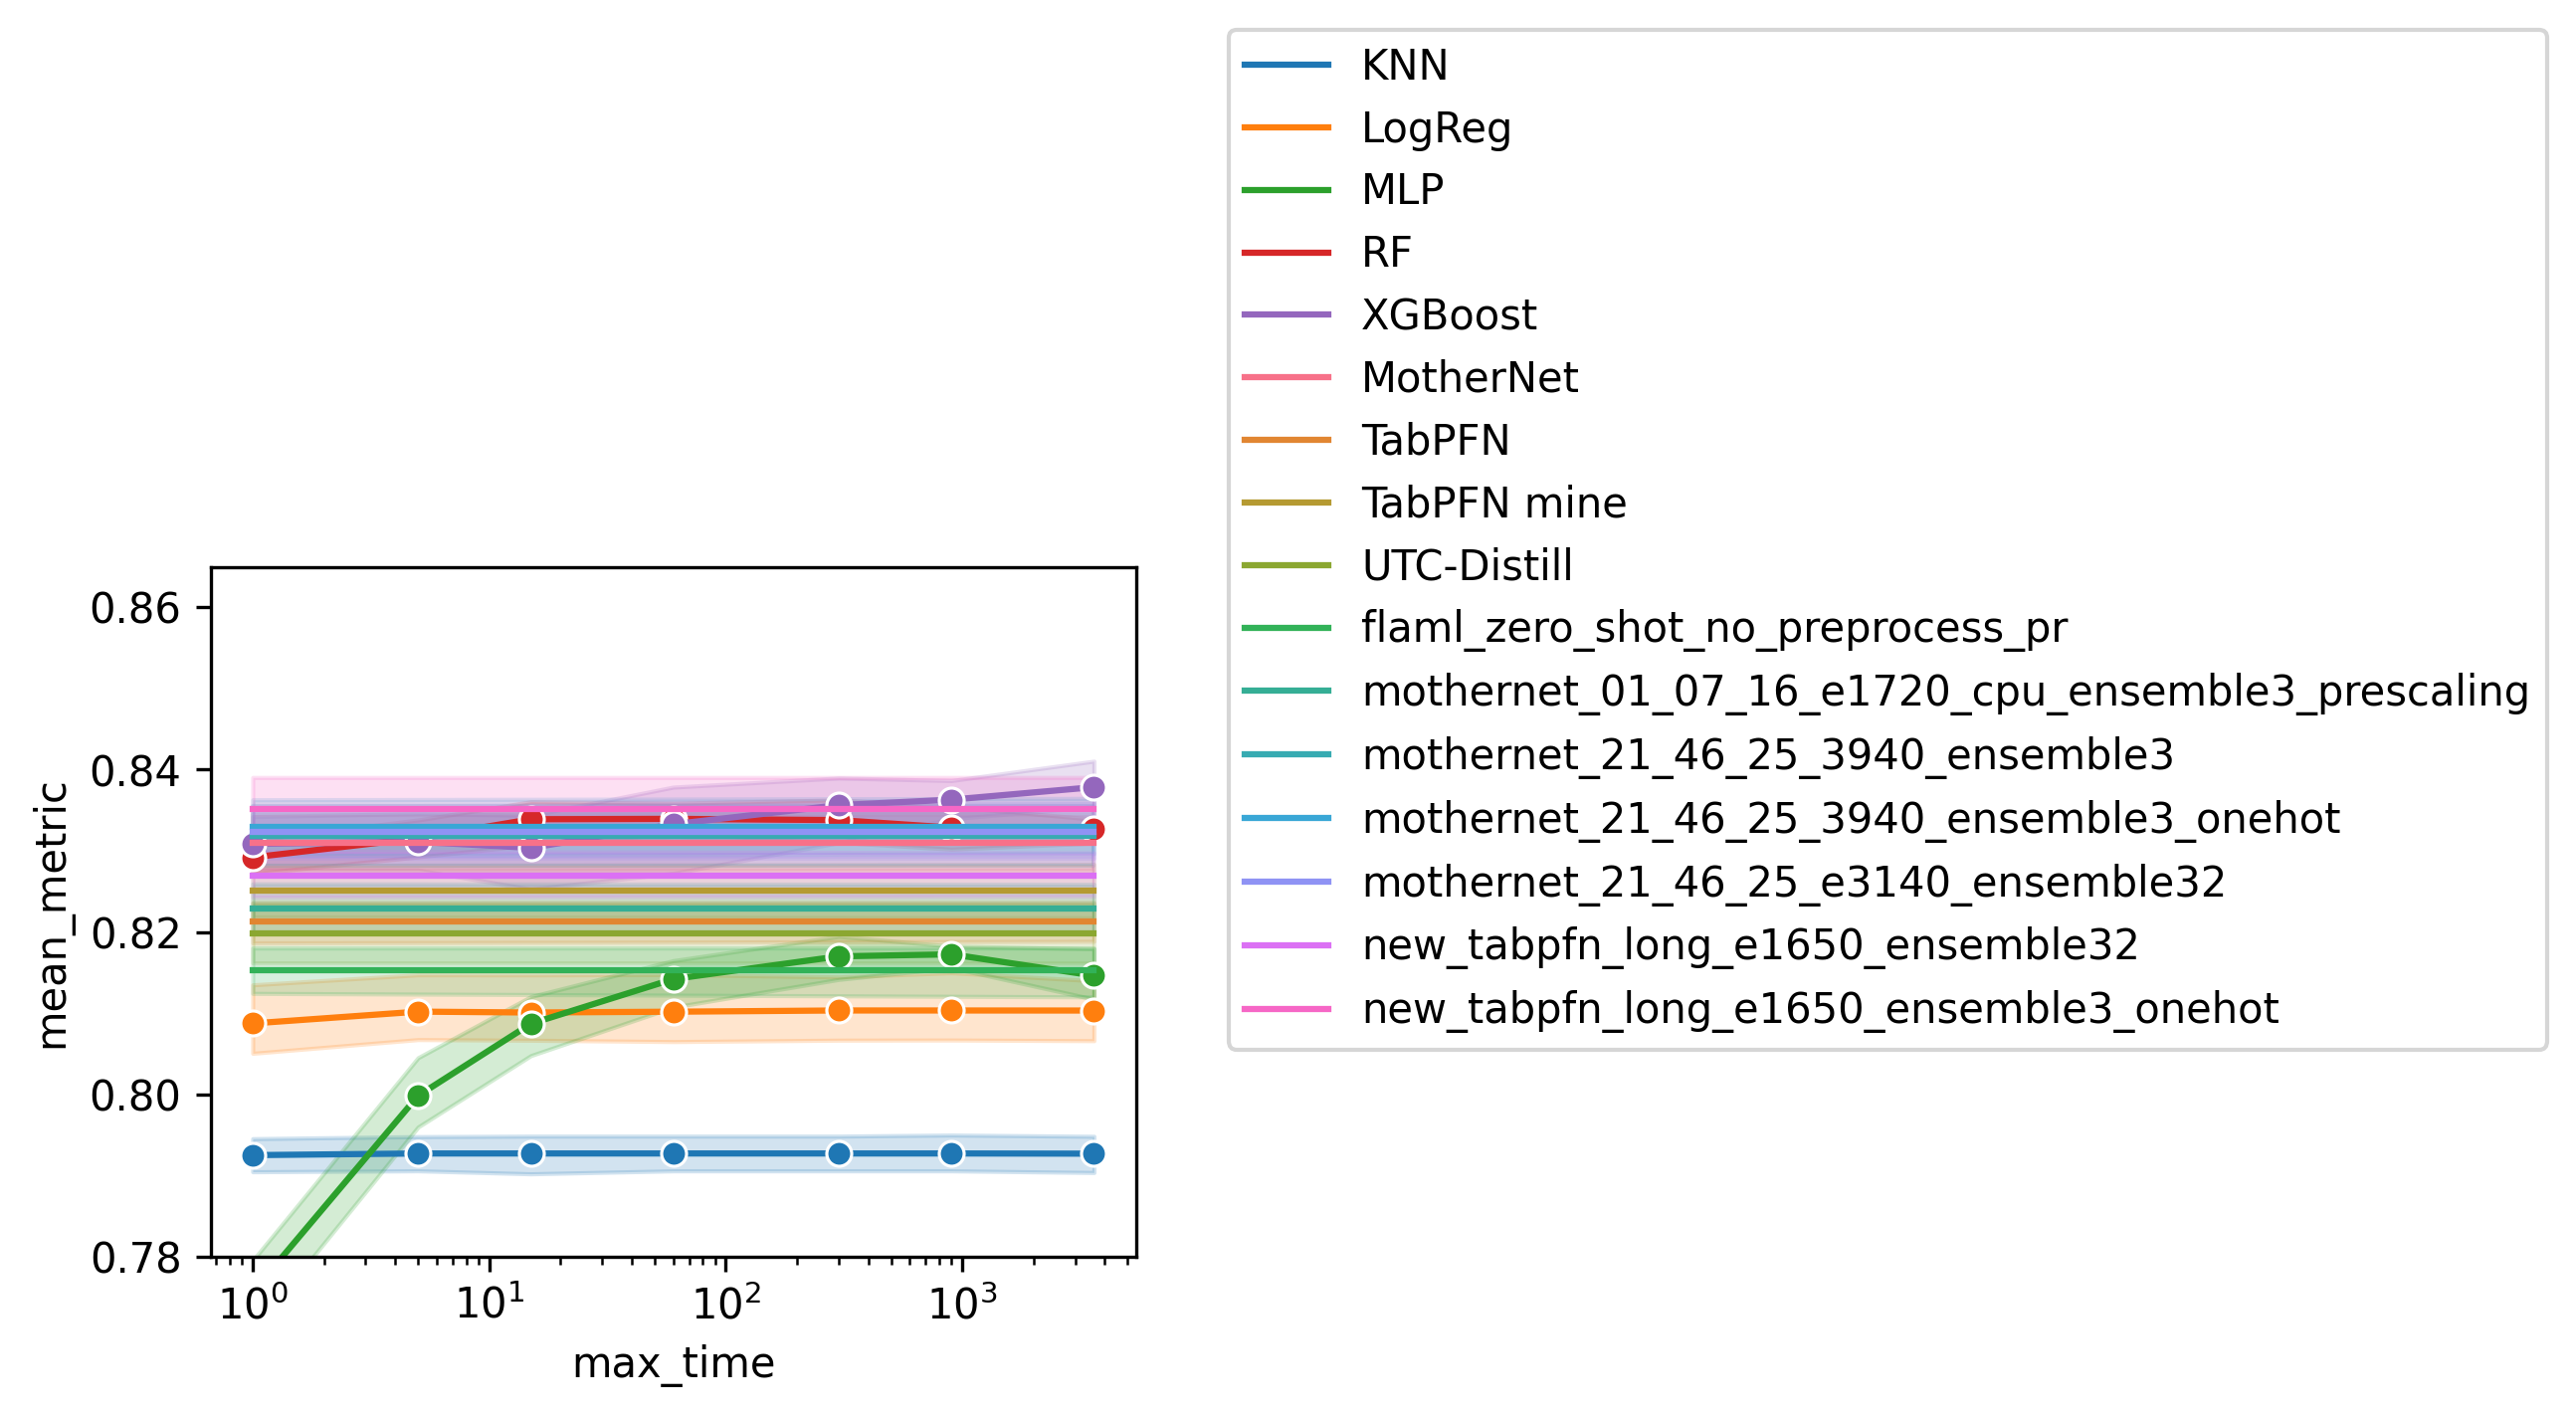

In [21]:
plt.figure(figsize=(4, 3), dpi=300)

compare_splits = remove_device_from_frame(results_df.groupby(["model", "split", "max_time"])['mean_metric'].mean().reset_index())

import seaborn as sns
varies_over_time = ['KNN', 'XGBoost', 'RF', 'MLP', 'KNN', 'LogReg', ]
compare_splits_varies = compare_splits[compare_splits.model.isin(varies_over_time)]
compare_splits_fixed = compare_splits[~compare_splits.model.isin(varies_over_time)]
hue_order = compare_splits_varies.model.unique().tolist() + compare_splits_fixed.model.unique().tolist()

# ax = sns.lineplot(data=compare_splits_varies, x="max_time", y="mean_metric", hue="model", errorbar="sd", marker="o", palette=color_palette[:len(varies_over_time)])
ax = sns.lineplot(data=compare_splits_varies, x="max_time", y="mean_metric", hue="model",  marker="o")

compare_splits_fixed_dummy = compare_splits_fixed.copy()
compare_splits_fixed_dummy['max_time'] = compare_splits_varies.max_time.max()
sns.lineplot(data=pd.concat([compare_splits_fixed, compare_splits_fixed_dummy]),
             x="max_time", y="mean_metric", hue="model", ax=ax) #, palette=color_palette[len(varies_over_time):compare_splits.model.nunique()])
#sns.lineplot(data=pd.concat([compare_splits_fixed, compare_splits_fixed_dummy]),
#             x="max_time", y="mean_metric", hue="model", errorbar="sd", ax=ax, palette=color_palette[len(varies_over_time):compare_splits.model.nunique()])
#sns.move_legend(ax, (1.01, 0))
ax.set_xscale("log")
plt.legend(loc=(1.1 , .3))
ax.set_ylim(0.78, 0.865)


In [22]:
compare_splits_varies_last = compare_splits_varies[compare_splits_varies.max_time == compare_splits_varies.max_time.max()]

<AxesSubplot:xlabel='mean_metric', ylabel='model'>

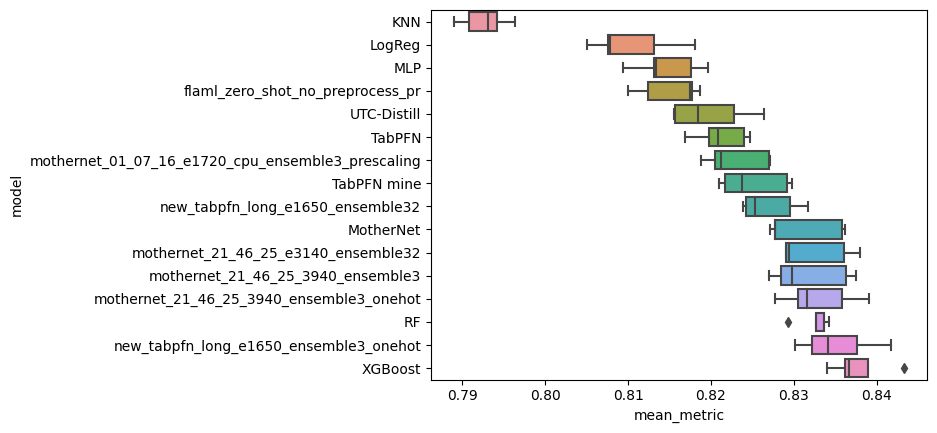

In [23]:
order = pd.concat([compare_splits_fixed, compare_splits_varies_last]).groupby("model").median("mean_metric").sort_values("mean_metric").index
sns.boxplot(data=pd.concat([compare_splits_fixed, compare_splits_varies_last]), y="model", x="mean_metric", order=order)

In [61]:
average_over_splits = results_df.groupby(["dataset", "model", "max_time"])[["mean_metric", "fit_time", "inference_time"]].mean().reset_index()

In [62]:
best_tuned = average_over_splits[average_over_splits.max_time == average_over_splits.max_time.max()]
untuned = average_over_splits[~average_over_splits.model.isin(best_tuned.model.unique())]
combined_best = pd.concat([best_tuned, untuned])

In [63]:
combined_best

,dataset,model,max_time,mean_metric,fit_time,inference_time
6,Australian,KNN,3600,0.906615,0.000251,0.005291
13,Australian,LogReg,3600,0.914737,0.003780,0.000171
20,Australian,MLP,3600,0.911973,0.888753,0.001075
28,Australian,RF,3600,0.928492,0.136285,0.101421
38,Australian,XGBoost,3600,0.929038,1.126681,0.008836
...,...,...,...,...,...,...
6700,xd6,mothernet_21_46_25_3940_ensemble3,1,0.995080,1.883850,0.020492
6701,xd6,mothernet_21_46_25_3940_ensemble3_onehot,1,0.976373,5.410200,0.030162
6702,xd6,mothernet_21_46_25_e3140_ensemble32,1,0.996697,26.660755,0.215365
6703,xd6,new_tabpfn_long_e1650_ensemble32,1,1.000000,0.000580,28.551259


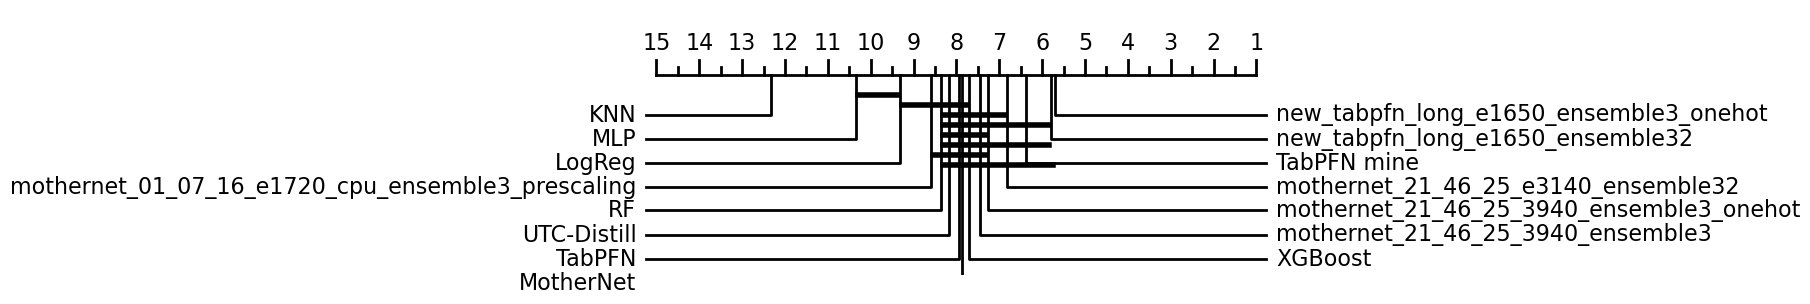

In [64]:
from tabpfn.scripts.critical_differences import draw_cd_diagram
res = draw_cd_diagram(remove_device_from_frame(combined_best), dataset_column="dataset", classifier_column="model", metric_column="mean_metric");

In [65]:
results_for_ranking = results_df.pivot(index="max_time", columns=["dataset", "split", "model"], values="mean_metric").ffill()

ranks_per_split_per_dataset = results_for_ranking.stack("model").unstack("max_time").rank(ascending=False)
average_ranks = ranks_per_split_per_dataset.stack("dataset").unstack("model").mean().reset_index(name="mean_rank")

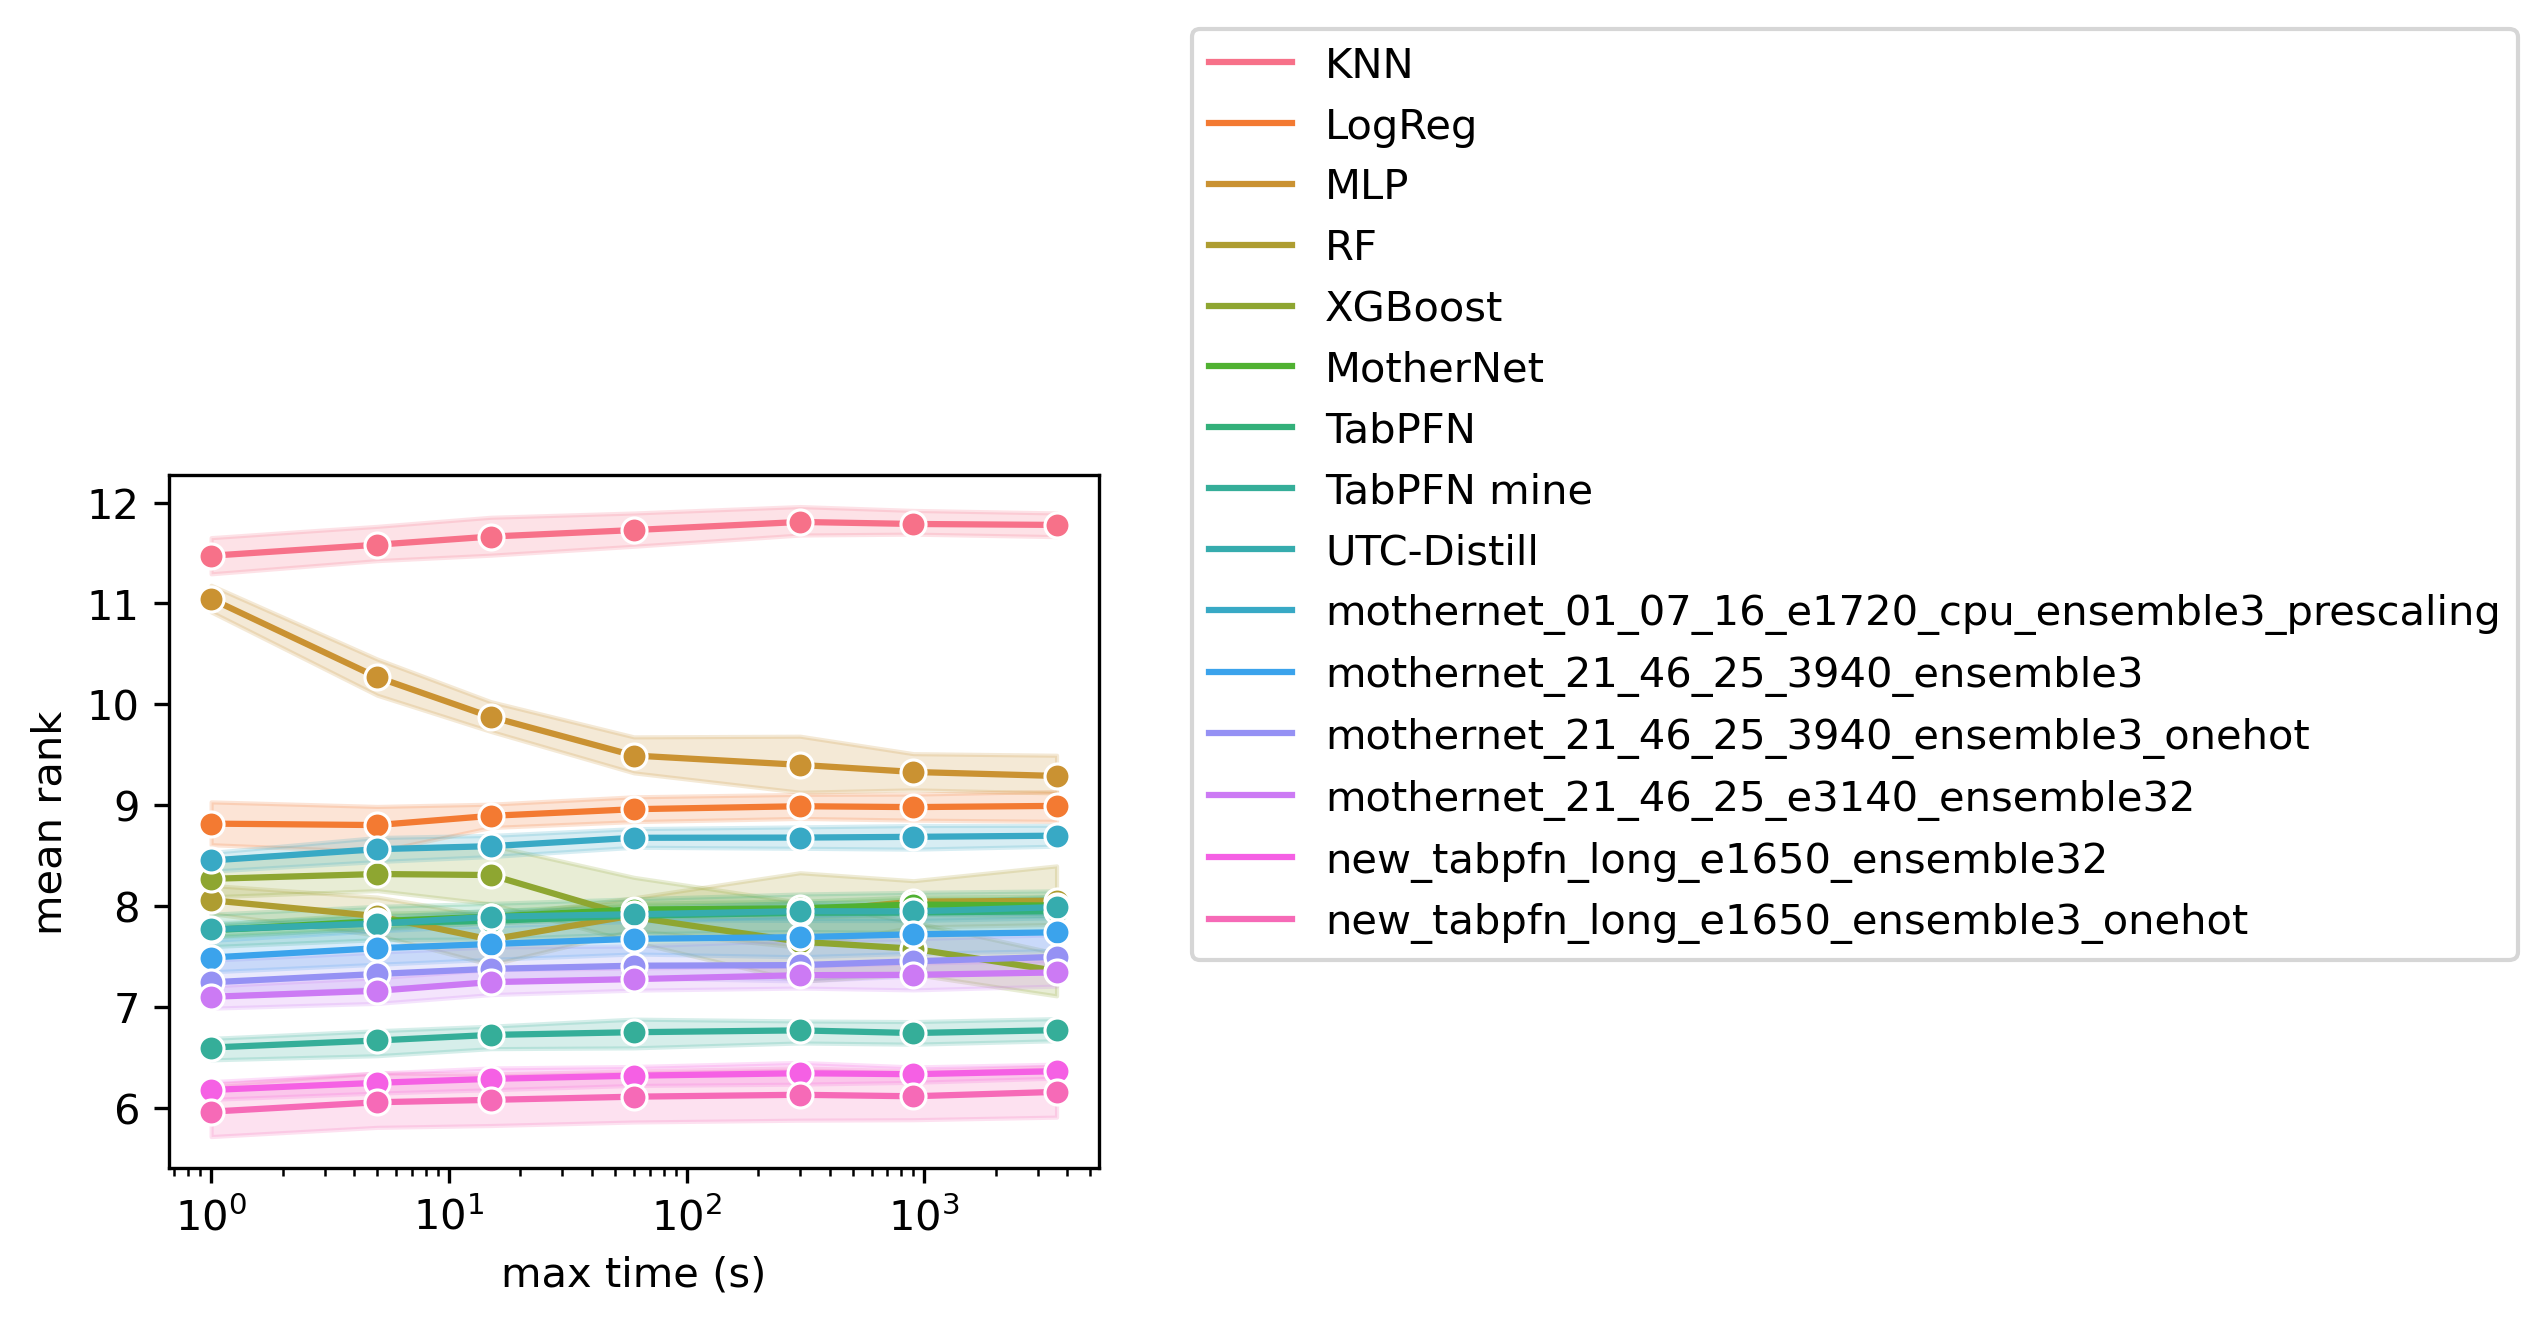

In [66]:
# ax = sns.lineplot(data=average_ranks, x="max_time", y="mean_rank", hue="model", errorbar="sd", marker="o")
plt.figure(figsize=(4, 3), dpi=300)
ax = sns.lineplot(data=remove_device_from_frame(average_ranks), x="max_time", y="mean_rank", hue="model", marker="o", hue_order=hue_order)
ax.set_xscale("log")
#sns.move_legend(ax, (1.01, 0))
ax.set_ylabel("mean rank")
ax.set_xlabel("max time (s)")
plt.legend(loc=(1.1 , .3))
legend = ax.get_legend()
#legend.remove()
plt.savefig("rank_over_time_validation_no_legend.pdf", bbox_inches="tight")

NameError: name 'with_tuning' is not defined

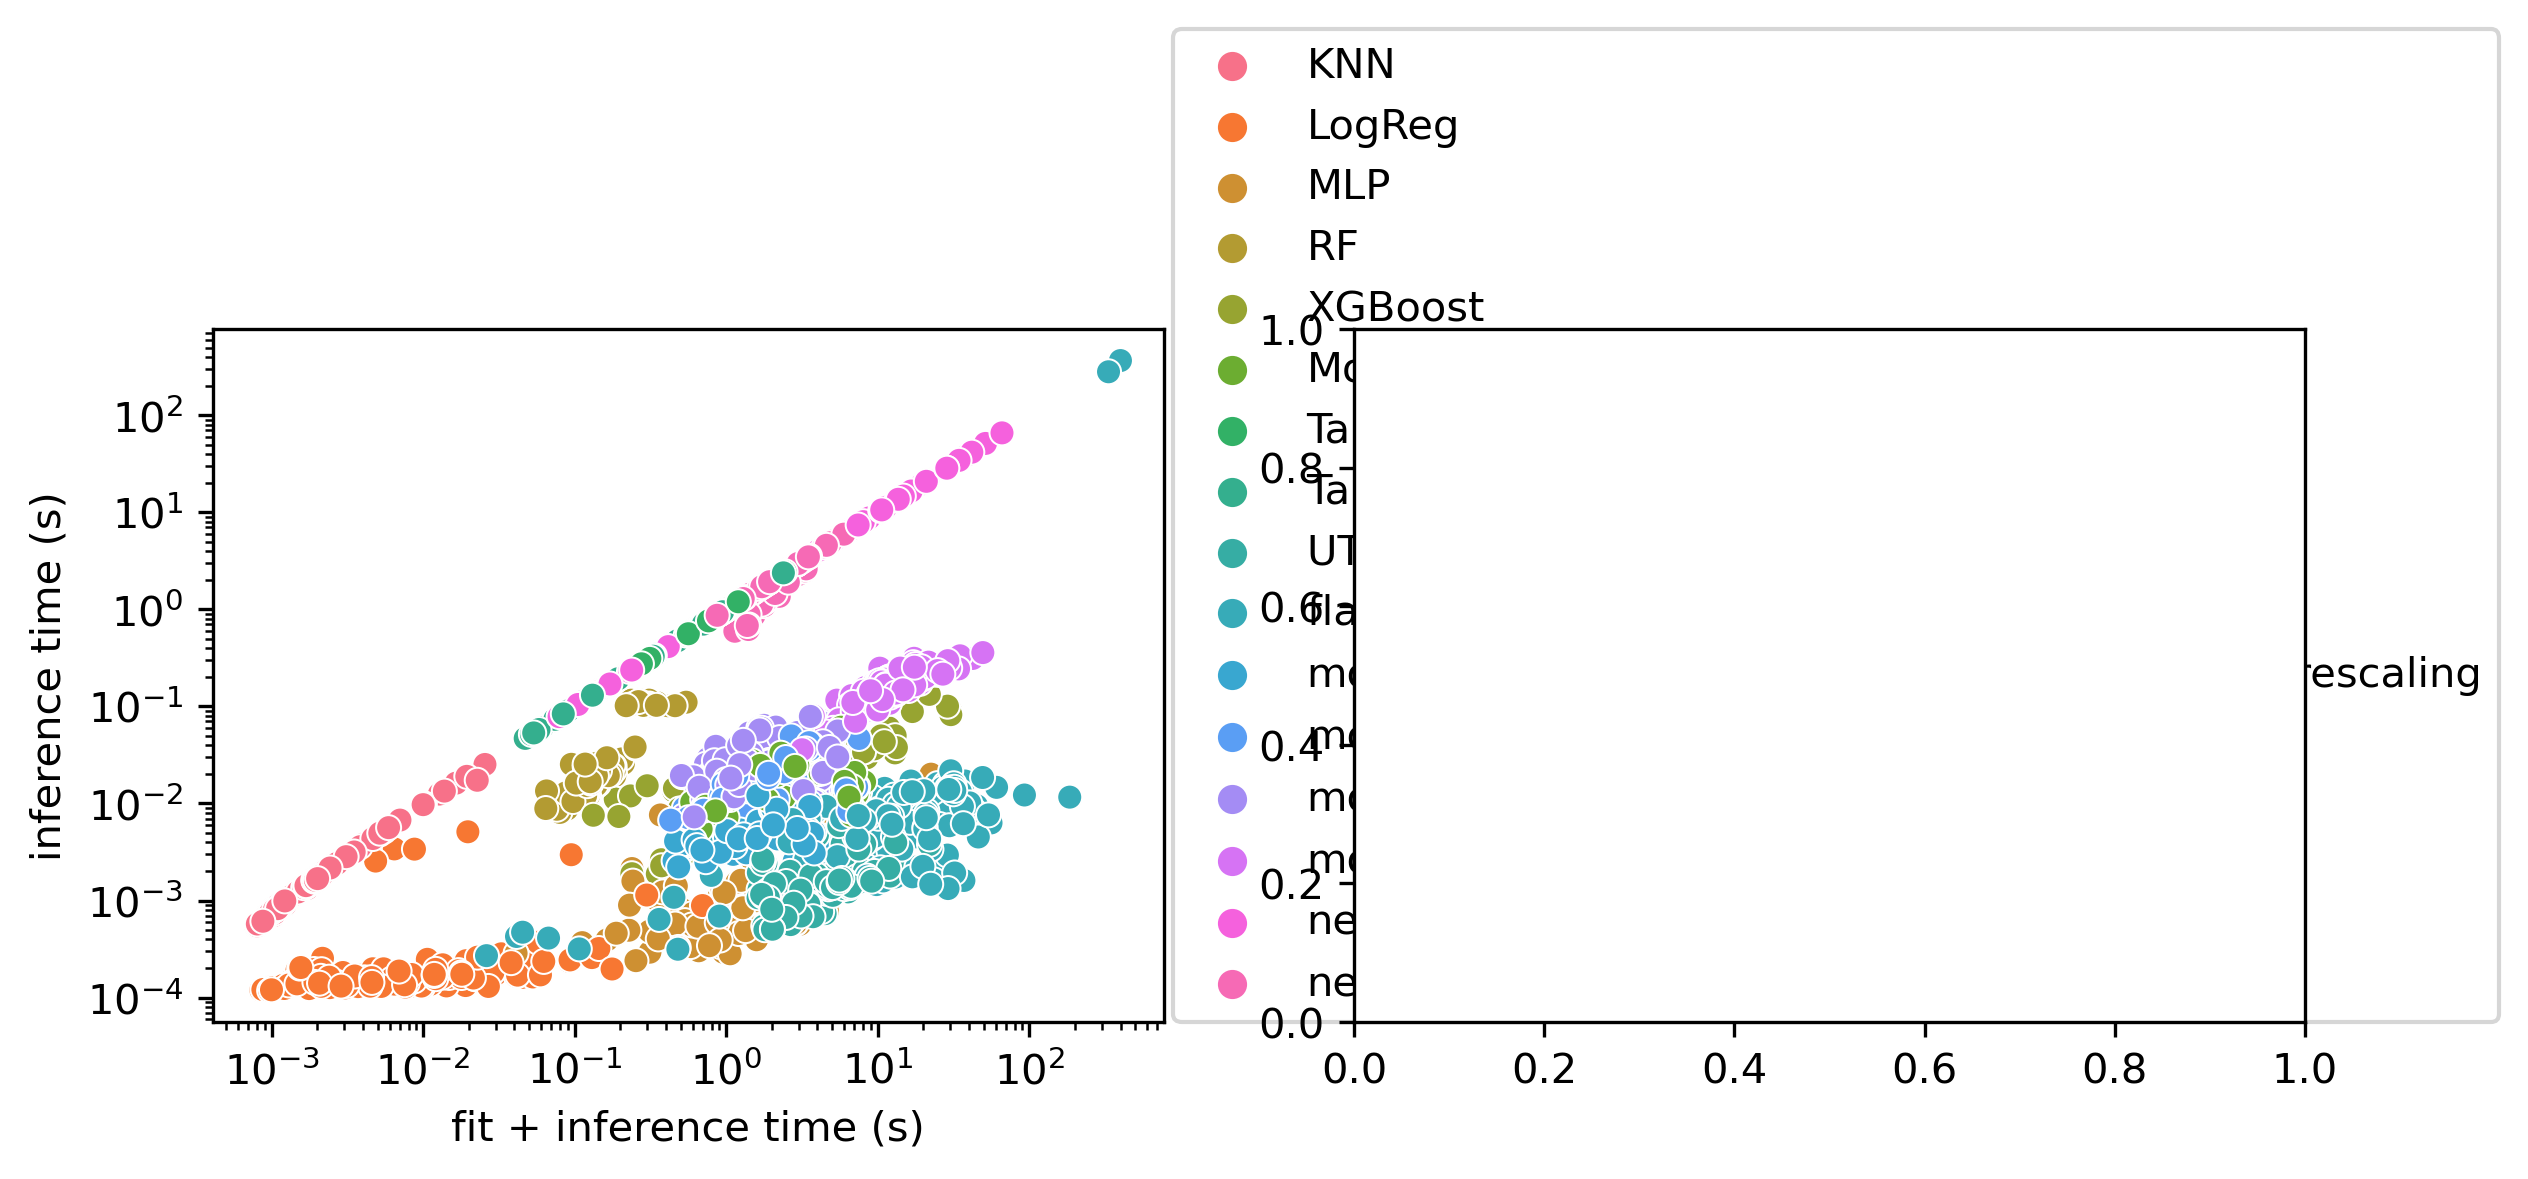

In [29]:

combined_best = pd.concat([best_tuned, untuned])
combined_best = combined_best[~combined_best.model.isin(["tabpfn_post_mlflow", "distill_tabpfn_scaled"])].copy()
max_time = combined_best.max_time.max()

fig, axes = plt.subplots(1, 2, figsize=(9, 3), dpi=300)

combined_best['fit_and_predict_time'] = combined_best['fit_time'] + combined_best['inference_time']

#sns.scatterplot(data=combined_best, y="inference_time", x="fit_and_predict_time", hue="model", ax=axes[0], hue_order=["MotherNet", "TabPFN GPU", 'TabPFN-distill GPU', 'XGBoost', 'MotherNet GPU', "KNN", "LogReg", "RF", "MLP"])
sns.scatterplot(data=combined_best, y="inference_time", x="fit_and_predict_time", hue="model", ax=axes[0])
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlabel("fit + inference time (s)")
axes[0].set_ylabel("inference time (s)")
legend = axes[0].legend(loc=(1.01, 0))
#sns.move_legend(axes[0], (1.01, 0))

combined_best['fit_predict_tuning'] = combined_best['fit_and_predict_time'].copy()
#with_tuning = with_tuning[with_tuning.model.isin(["MotherNet", "TabPFN GPU", 'TabPFN-distill GPU', 'XGBoost', 'MotherNet GPU'])]
combined_best.fit_predict_tuning[with_tuning.model == "XGBoost"] = combined_best.fit_and_predict_time[with_tuning.model == "XGBoost"] + max_time
combined_best.fit_predict_tuning[with_tuning.model == "MLP"] = combined_best.fit_and_predict_time[with_tuning.model == "MLP"] + max_time
combined_best.fit_predict_tuning[with_tuning.model == "KNN"] = combined_best.fit_and_predict_time[with_tuning.model == "KNN"] + max_time
combined_best.fit_predict_tuning[with_tuning.model == "RF"] = combined_best.fit_and_predict_time[with_tuning.model == "RF"] + max_time
combined_best.fit_predict_tuning[with_tuning.model == "LogReg"] = combined_best.fit_and_predict_time[with_tuning.model == "LogReg"] + max_time


#sns.scatterplot(data=with_tuning, y="inference_time", x="fit_and_predict_time", hue="model", ax=axes[1], hue_order=["MotherNet", "TabPFN GPU", 'TabPFN-distill GPU', 'XGBoost', 'MotherNet GPU'])
sns.scatterplot(data=combined_best, y="inference_time", x="fit_predict_tuning", hue="model", ax=axes[1])
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel("fit + inference time + tuning (s)")
axes[1].set_ylabel("inference time (s)")

axes[1].legend().remove()
plt.tight_layout()
plt.savefig("timing_comparison_GPU_two_panels_gpu_mlp_utc_validation.pdf")

In [131]:
fit_times = combined_best.set_index(['dataset', 'model']).unstack("model").fit_time
fit_times.divide(fit_times['XGBoost'], axis='rows').mean()

fit_and_predict_time = combined_best.set_index(['dataset', 'model']).unstack("model").fit_and_predict_time
fit_and_predict_time.divide(fit_and_predict_time['XGBoost'], axis='rows').mean()

model
KNN                0.000147
LogReg             0.005456
MLP                1.121446
MotherNet CPU      0.855695
MotherNet GPU      0.058835
RF                 0.057298
TabPFN GPU         0.000129
UTC-Distill GPU    1.042782
XGBoost            1.000000
dtype: float64

In [135]:
combined_best.columns

Index(['dataset', 'model', 'max_time', 'mean_metric', 'fit_time',
       'inference_time', 'fit_and_predict_time'],
      dtype='object')

model
KNN                0.000983
LogReg             0.005484
MLP                1.107485
MotherNet CPU      0.848098
MotherNet GPU      0.060272
RF                 0.065288
TabPFN GPU         0.282888
UTC-Distill GPU    1.033675
XGBoost            1.000000
dtype: float64

In [253]:
results_df

,dataset,model,mean_metric,split,max_time,best,fit_time,inference_time
0,breast-cancer,KNN,0.661028,1,1,{'n_neighbors': 13},0.000223,0.001148
1,breast-cancer,KNN,0.687982,2,1,{'n_neighbors': 13},0.000218,0.001148
2,breast-cancer,KNN,0.639348,3,1,{'n_neighbors': 14},0.000214,0.001040
3,breast-cancer,KNN,0.697394,4,1,{'n_neighbors': 14},0.000223,0.001092
4,breast-cancer,KNN,0.687948,5,1,{'n_neighbors': 11},0.000226,0.001065
...,...,...,...,...,...,...,...,...
41715,titanic,mothernet_21_46_25_e3140_ensemble3_no_feature_...,0.861558,1,1,NaN,1.699975,0.016236
41716,titanic,mothernet_21_46_25_e3140_ensemble3_no_feature_...,0.869618,2,1,NaN,1.654067,0.018084
41717,titanic,mothernet_21_46_25_e3140_ensemble3_no_feature_...,0.865918,3,1,NaN,1.647967,0.017199
41718,titanic,mothernet_21_46_25_e3140_ensemble3_no_feature_...,0.884482,4,1,NaN,1.658214,0.017887


In [67]:
bla = results_df.groupby(["model", "dataset", "max_time"])['mean_metric'].mean().reset_index()

In [68]:
bla.model.unique()

array(['KNN', 'LogReg', 'MLP', 'MotherNet', 'RF', 'TabPFN GPU',
       'TabPFN mine', 'UTC-Distill GPU', 'XGBoost',
       'mothernet_01_07_16_e1720_cpu_ensemble3_prescaling',
       'mothernet_21_46_25_3940_ensemble3',
       'mothernet_21_46_25_3940_ensemble3_onehot',
       'mothernet_21_46_25_e3140_ensemble32',
       'new_tabpfn_long_e1650_ensemble32',
       'new_tabpfn_long_e1650_ensemble3_onehot'], dtype=object)

In [69]:
filtered = bla[bla.model.isin(["new_tabpfn_long_e1650_ensemble3_onehot", "XGBoost"])]

In [70]:
with_max_time = filtered.groupby(["model", "dataset"]).max().reset_index()

In [71]:
compare = with_max_time.pivot(index="dataset", columns="model", values="mean_metric")

In [74]:
different = compare[np.abs(compare.diff(axis=1).iloc[:, 1]) > 0.15]

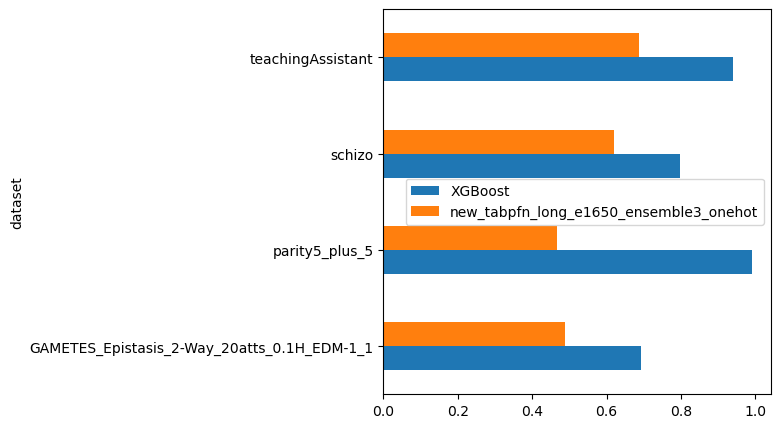

In [78]:
#plt.figure(figsize=(5, 15))
plt.figure(figsize=(5, 5))
different.plot.barh(ax=plt.gca())
plt.legend(loc="best")

In [31]:
cc_valid_datasets_multiclass_df.set_index("name").loc["iris"]

did                                       61
version                                    1
uploader                                   1
status                                active
format                                  ARFF
MajorityClassSize                       50.0
MaxNominalAttDistinctValues              3.0
MinorityClassSize                       50.0
NumberOfClasses                          3.0
NumberOfFeatures                         5.0
NumberOfInstances                      150.0
NumberOfInstancesWithMissingValues       0.0
NumberOfMissingValues                    0.0
NumberOfNumericFeatures                  4.0
NumberOfSymbolicFeatures                 1.0
Name: iris, dtype: object

Bad pipe message: %s [b'\x9c?\xb0DAB.a\x99n`v\xb8\xa0\xd2T\x86\xf9 S28\x90\xc1\xc5\x800\xe8\x998\xaaG"s\xb8\xec1#r$Mq\xb6\xdaE*\n\xcf|f1\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04', b'', b'']
Bad pipe message: %s [b'']
Bad pipe message: %s [b"_\xaaM\xb6_\x07\xcc,t\xfd\xbf:\xbb\xa8\xa9\x14x\x0e \xfd'W\x86\xd1"]
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xfba\x90\xa2\x84\xb4\x1ex\x93\x06\xe8T\xe6^\xdaV\xb0\xb4\xb8\x85\xda\x84']
Bad pipe message: %s [b"\x9dW\xbecKI\xb3\xab\x8b\xcc]\t,^\x9b\x87 \xc3\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\

In [298]:
grr = compare.merge(cc_valid_datasets_multiclass_df, left_on="dataset", right_on="name")

In [299]:
grr['fraction_symbolic'] = grr.NumberOfSymbolicFeatures / grr.NumberOfFeatures
grr['difference'] = grr.mothernet_21_46_25_e3140_ensemble3 - grr.XGBoost

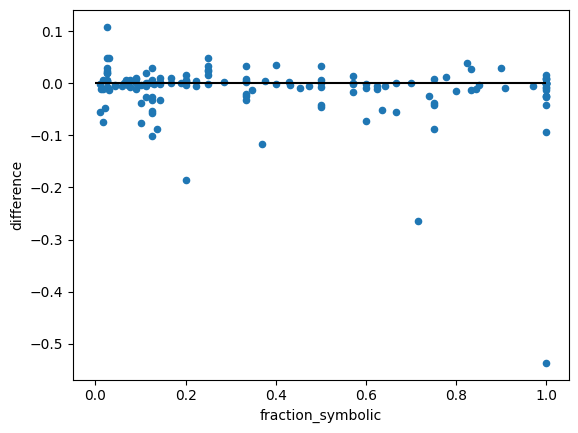

In [305]:
grr.plot.scatter(x="fraction_symbolic", y="difference")
plt.hlines([0], 0, 1, color='k')

AttributeError: Can only use .dt accessor with datetimelike values

Bad pipe message: %s [b"\xdfN\xdf\x15.\xb8\xae\xfa)\x85\xae\x8c\x01\x16\x1f1\xdat\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x03\x03\x02\x03\x03\x01"]
Bad pipe message: %s [b'\x03', b'\x02']
Bad pipe message: %s [b'\x05\x02\x06']
Bad pipe message: %s [b'\xd4gc\x8bs\xcf\xec\xf8\xdd\x10\x82~\x89\xa6(m\x80)\x00\x00\

In [308]:
from sklearn.datasets import fetch_openml
df = fetch_openml("parity5_plus_5").frame
import dabl
dabl.plot(df, target_col="class")

In [309]:
df

,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,Bit_10,class
0,1,1,0,0,1,0,0,0,0,1,1
1,1,0,0,0,0,1,1,1,1,0,0
2,0,0,1,0,1,1,1,1,1,1,1
3,0,1,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1119,0,0,1,0,1,1,0,1,1,0,1
1120,0,1,0,0,1,0,0,0,1,1,1
1121,0,1,0,0,1,1,0,0,1,0,0
1122,1,1,0,0,1,1,1,0,1,0,0


ModuleNotFoundError: No module named 'dabl'

array([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4])